# Tutorial1_Extension

Here I try to explore some of the concepts that I did not understand very well from the tutorial.


# Libraries

In [3]:
# mathematical
import numpy as np

# plotting
import matplotlib.pyplot as plt

# Covariance Matrix

My understanding of the covariance matrix is very much based on stats, where:

$$\mathrm{Cov}(X,Y) = E\left [ \left(X-\mu_X\right) \left(Y-\mu_Y\right)\right ] = E\left [XY\right]-\mu_X\mu_Y$$

Now, if we were to generalise this for a matrix $\underline{\underline{X}}$ of predictors, where the $i$th index represents the datapoint (data index), and the $j$th index represents the feature (or predictor), we would have something like this:

$$\Sigma_{ij}= \frac{1}{n}X_{ki} X_{kj} - \mu_{ij}$$

Where the summation convention from index notation (Computational Continuum Mechanics) is applied.

However, we got a very odd definition in the machine learning course, which I still don't fully comprehend. This is, as per Dr Huthwaites notes:

$$C_{ij} = (X-\mu)_{ki}(X-\mu)_{kj}$$
Let's explore this.

His equation does seem very similar to the non-simplified one that we wrote in the beginning, meaning it is something like this:

$$\Sigma_{ij} = E\left[C_{ij}\right]$$

Let's explore this further

In [18]:
# my understanding

def covariance_matrix(X):
    """
    Calculates the covariance matrix for a given input X with n = X.shape[1] predictors
    """
    n = X.shape[1]
    n_points = X.shape[0]
    Sigma = np.zeros([n,n])
    mu = [X[:,i].mean(axis = 0) for i in range(n)]
    print(mu)
    for i in range(n): # rows
        for j in range(i,n):
            Sigma[i,j] = (X[:,i]*X[:,j]).sum(axis = 0)/n_points - mu[i]*mu[j]
            if i != j:
                Sigma[j,i] = Sigma[i,j]
            
    return Sigma

X = np.array(
    [[1,2],
     [3,4],
     [5,7]]
)    

Sigma = covariance_matrix(X)
Sigma

[3.0, 4.333333333333333]


array([[2.66666667, 3.33333333],
       [3.33333333, 4.22222222]])

In [27]:
def huthwaite_cov(X):
    """
    Calculates the huthwaite covariance matrix
    """
    n = X.shape[1]
    n_points = X.shape[0]
    C = np.zeros([n,n])
    mu = [X[:,i].mean(axis = 0) for i in range(n)]
    print(mu)
    for i in range(n): # rows
        for j in range(i,n):
            C[i,j] = ((X[:,i]-mu[i])*(X[:,j]-mu[j])).sum(axis = 0)
            if i != j:
                C[j,i] = C[i,j]
            
    return C

def covariance_matrix(C):
    """
    Calculates the covariance matrix from the huthwaite_matrix C
    """
    pass

# not quite convinced?

X = np.array(
    [[1,2],
     [3,4],
     [5,7]]
)    

C = huthwaite_cov(X)

Sigma = C/3
Sigma

[3.0, 4.333333333333333]


array([[2.66666667, 3.33333333],
       [3.33333333, 4.22222222]])

It seems that our understanding of Huthwaite's C function was in fact correct. It's quite odd that he would use such a definition, perhaps it's worth discussing this with him?

The tutorial included another covariance matrix, albeit this was a bit, confusing?
It did not make sense to me. So it's worth exploring this for a bit.

In [232]:
def get_cov(*sigma, **kwargs):
    """
    Creates a covariance matrix based on the value of theta 
    
    Attributes:
    -----------
    
    *sigma: *int
        Can be 2 or 3 dimensions, defines the standard deviations for each degree of freedom
        
    **kwargs: *keyword = *int
        kwargs for the create_rotation_matrix function, defines the intensity of the covariance
        
    Notes:
    ------
    - add functionality for N dimension sigma (in that case, the concept of the rotation matrix would cease
    to exist though)
    
    """
    dof = len(sigma)
    covar = np.zeros([dof,dof])
    for i,std in enumerate(sigma):
        covar[i,i] = std
    
    kwargs.update((x, y / 360 * 2 * np.pi) for x, y in kwargs.items()) # convert angles to radians
    R = create_rotation_matrix(**kwargs)
    try:
        covar = np.matmul(np.matmul(R, covar), R.T)
    except:
        raise ValueError((
            'Your covariance matrix is expected to be of shape {}, whereas your rotation matrix is of'
            'shape {}. Check that you are not trying to rotate a 2D matrix in 3 dimensions'
        ).format(covar.shape,R.shape))

    return covar

def create_rotation_matrix(theta_x = 0,theta_y = None, theta_z = None):
    """
    creates the 2D or 3D rotation matrices depending on the inputs that are given. Note that all angles must
    in RADIANS
    
    Attributes:
    -----------
    
    theta_x: int
        defines the yaw of the system
    
    theta_y: int
        defines the pitch of the system
    
    theta_z: int
        defines the roll of the system
    """
    
    if theta_y != None and theta_z != None:
        R_x = np.array([
            [1, 0, 0],
            [0, np.cos(theta_x), -np.sin(theta_x)],
            [0, np.sin(theta_x), np.cos(theta_x)]
        ])
        
        R_y = np.array([
            [np.cos(theta_y), 0, np.sin(theta_y)],
            [0, 1, 0],
            [-np.sin(theta_y),0, np.cos(theta_y)]
        ])
        
        R_z = np.array([
            [np.cos(theta_z), -np.sin(theta_z), 0],
            [np.sin(theta_z), np.cos(theta_z), 0],
            [0,0,1]
        ])
        R = np.matmul(np.matmul(R_x,R_y),R_z)
        
    else:
        R = np.array([
            [np.cos(theta_x), -np.sin(theta_x)],
            [np.sin(theta_x), np.cos(theta_x)]
        ])
        
    return R


# create a function that can plot the covariances for multiple plots, i.e. 2D 3D as a function of the theta
# that you give it (maybe it's best to convert what you have above into a CLASS for ease?)

After exploration, it seems to me that Huthwaite's get_cov function is just a makeshift method for creating a covariance matrix...

This is because after multiplication, you are left with the following:


$$\mathrm{Cov} = \left [\begin{matrix}
\sigma_x^2 & \sigma_x\cos\theta\sin\theta - \sigma_y\cos\theta\sin\theta \\
\sigma_x\cos\theta\sin\theta - \sigma_y\cos\theta\sin\theta  & \sigma_y^2
\end{matrix}\right]$$

Theta thus controls the degree to which these points are related.

# Creating a probability distribution from the covariance

Here, we try to recreate a normal distribution based on the covariance matrix.

Note the general equation (not written in index notation due to complexity)


$$p(\,{\underline{x}\,}) = \frac{1}{(2\pi)^{\frac{k}{2}}|\Sigma|^\frac{1}{2}}
\exp\left [
-\frac{1}{2}(x-\mu)^T \Sigma ^{-1} (x-\mu)
\right]
$$

Note here that $\underline{x}$ represents a vector of **variables**, so each one is actually a vector. So that can get expanded into a matrix. Let's think about how we would formulate this?

# Meshgrid

In order to find the distribution for this, since we have an N by N problem, we can't simply do what we'd do for a single degree of freedom system...

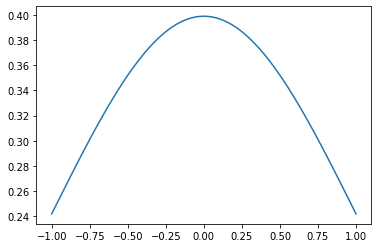

In [117]:
# let's first try this for a single degree of freedom system

mu = 0
sigma = 1

x = np.linspace(-1,1,200) # 200 points

p = 1/(np.sqrt(2*np.pi)*sigma) * np.exp(-(1/2)*np.power((x-mu),2)/sigma)

plt.plot(x,p)

# a guassian, as we might expect

In [160]:
# explanation of code from the tutorial


x1_line = np.linspace(-1,1, 200)
x2_line = np.linspace(-1,1, 100)
x3_line = np.linspace(-1,1,300)

x1_grid, x2_grid, x3_grid= np.meshgrid(x1_line, x2_line, x3_line)
print(x1_grid.shape)
print(x2_grid.shape)
print(x3_grid.shape)


# what meshgrid does is:
# it duplicates the same pattern to a dimension that is N_1 x N_2 x N_3 .. N_n, where each N is a line of size 
# different size
X_grid = np.array([x1_grid, x2_grid, x3_grid]).reshape(3, 200*100*300).T
X_grid

(100, 200, 300)
(100, 200, 300)
(100, 200, 300)


array([[-1.        , -1.        , -1.        ],
       [-1.        , -1.        , -0.99331104],
       [-1.        , -1.        , -0.98662207],
       ...,
       [ 1.        ,  1.        ,  0.98662207],
       [ 1.        ,  1.        ,  0.99331104],
       [ 1.        ,  1.        ,  1.        ]])

From the above, I'm not exactly sure what the reshape is doing... 
It's very difficult to imagine this in 3D... but let's try to do it!

In [319]:
# for a 2D plot, we now need to actually think about the dimensions
# Since this can technically be done for n dimensions, let's make it as such!

def gridspacer(*gridparams, mu = [0,0]):
    """
    creates a meshgrid
    
    Attributes:
    -----------
    
    *gridparams: *[int, int, int]
        N lists of the following format [X_min, X_max, n_samples]
    """
    n = len(gridparams)
    lines = []
    grids = []
    axes = [] #this axes was added as a last minute save!
    total_size = 1
    for parameters, mean in zip(gridparams,mu):
        axes.append(np.linspace(*parameters))
        lines.append(np.linspace(*parameters)- mean)
        total_size *= parameters[2]
        
    for grid in np.meshgrid(*lines):
        grids.append(grid)
    

    X_grid = np.array(grids).reshape(n,total_size).T
    
    return lines, X_grid, axes
    
def gaussian(covar, X_grid):
    """
    a function that creates gaussian probabilities for a given covariance matrix
    
    Attributes:
    -----------
    covar: np.array
        an N by N covariance array
        
    """
        
    n = covar.shape[1]
    p = 1/(np.power(2*np.pi, n/2) * np.sqrt(np.linalg.det(covar))) * np.exp(
        -1/2 * (np.matmul(X_grid, np.linalg.inv(covar)) * X_grid ).sum(-1) #row sum
    )
    return p


# need to make this a class, RESHAPE function (see cell below), requires the *gridparams from 'gridspacer'

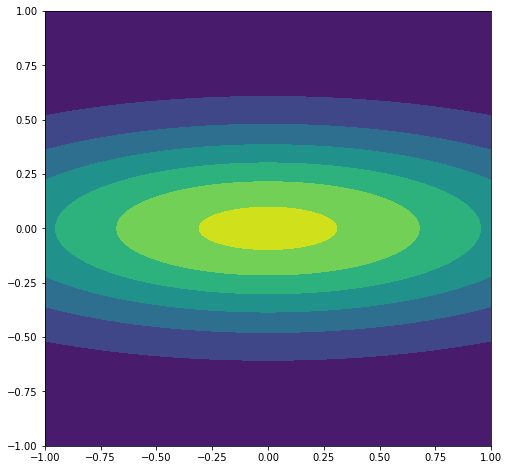

In [313]:
cov = get_cov(1, 0.1, theta_x = 0)

lines, X_grid, axes = gridspacer([-1,1,200],[-1,1,200], mu = [0,0])

p = gaussian(cov, X_grid)
p = p.reshape(200,200)

p.shape
plt.figure(figsize=(8,8))
plt.contourf(*axes, p)

# this cell has verified that my gaussian function works

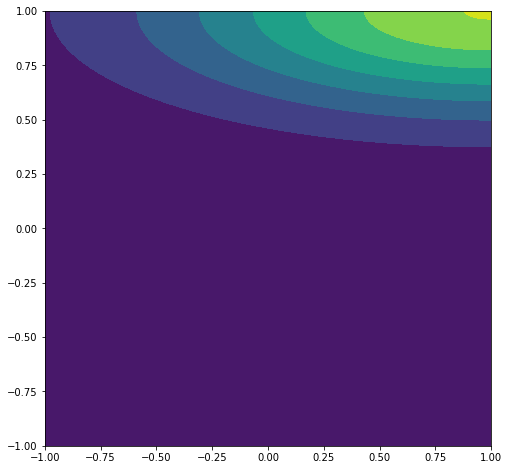

In [325]:
cov = get_cov(1, 0.1, 0.5, theta_x = 0, theta_y = 0, theta_z = 0)


lines, X_grid, axes = gridspacer([-1,1,200],[-1,1,200],[-1,1,200], mu = [1,1,0])
p = gaussian(cov,X_grid)
p = p.reshape(200,200,200)

plt.figure(figsize=(8,8))

plt.contourf(*axes[:-1],p.mean(axis = 2))
# so basically, axis = the N that is not being selected. When you have more than 2 vars, then I guess you need
# to take multiple means ?
# you cannot do more than four dimensions right now because of the way the covariance matrix is even defined...
# that said, you can make this even more abtract if you remove the theta contraints. Do this as a class
#problem !
# this seems to be working!!!
# let's create a plotting function now!

In [265]:
np.array([[1,2]
          ,[3,4]]).sum(1)

array([3, 7])